In [0]:
import numpy as np

# initialising  a matrix (16,64) 16 rows for each possible encoding of direction 
# so total of 2*2*2*2 =16 and all posiible 64 state

# dictionary to map direction
def map_2d_to_1d(i,j):
  return i*16+j

# to make a list, used in mapping the rows to a direction
def direction_mapping():
  direction=[]
  for i in range(2):#for north
    for j in range(2):#for south
      for k in range(2):#for east
        for l in range(2):# for west
          a=""
          if i%2==0:
            a+='0'
          else:
            a+='1'
          if j%2==0:
            a+='0'
          else:
            a+='1' 
          if k%2==0:
            a+='0'
          else:
            a+='1'
          if l%2==0:
            a+='0'
          else:
            a+='1'
          direction.append(a)
  return direction

# to calculate the distance between real observation and predicted direction
def d_calc(case_a,case_b):
  diff=0
  for i ,j in zip(case_a,case_b):
    diff+=(abs(ord(i)-ord(j)))
  return diff


# calculate transition probability
def transition_prob(act_obsrv,state):
#   act_obsrv[state]="0001"
  diff=0
#   print(state)
  if act_obsrv[state]=='-1': #that not a state in the map
    return 0
  else:
    for i  in act_obsrv[state]:
      diff+=(abs(ord(i)-ord('0')))
  if diff==0:#that is not reachable
    return 0
  else:
    return 1.0/diff

def initial_prob(a):
  count=0.0
  for i in a:
    if i=='-1':
      count+=1
  return 1.0/(64-count)

# observation model
def observation_model(e,d):
  return np.power(e,d)*np.power((1-e),4-d)
# transition_matrix
trans_mat=np.zeros((64),dtype=np.float)


#actual observation from the given map
act_obsrv=["0010","0011","0111","0101","-1","0110","0011","0011","0111","0001","-1","0010","0111","0001","-1","0000"]
# print(len(act_obsrv))
act_obsrv= act_obsrv+["-1","-1","1110","1101","-1","1100","-1","-1","1100","-1","0100","-1","1100","-1","-1","-1"]
# print(len(act_obsrv))
act_obsrv= act_obsrv+["-1","0110","1011","1101","-1","1100","-1","-1","1110","0111","1111","0011","1101","-1","-1","0100"]
# print(len(act_obsrv))
act_obsrv= act_obsrv+["0010","1001","-1","1010","0011","1001","-1","0010","1011","1011","1001","-1","1010","0011","0011","1001"]
# print(len(act_obsrv))
# this function will map a 2d matrix (i,j) to k


direction=direction_mapping();
print(direction)


for i in range(64):
  trans_mat[i]=transition_prob(act_obsrv,i)
  
  
e=0.05


# observation_matrix
obs_mat=np.zeros((16,64),dtype=np.float)

for i in range(64):
  for j in range(16):
    d=d_calc(act_obsrv[i],direction[j])
    obs_mat[j][i]=observation_model(e,d)
obs_mat=obs_mat.T
obs_mat=obs_mat/obs_mat.sum(axis=1)[:,None]
obs_mat=obs_mat.T


trans_prob_mat=np.zeros((64,64),dtype=np.float)
for i in range(4):
  for j in range(16):
    for k in range(4):
      for l in range(16):
        if abs(i-k)==1 and abs(j-l)==0:
          index1=map_2d_to_1d(i,j)
          index2=map_2d_to_1d(k,l)
          if(act_obsrv[index2]!='-1'):
            trans_prob_mat[index1][index2]=trans_mat[index1]
          
        if abs(i-k)==0 and abs(j-l)==1:
          index1=map_2d_to_1d(i,j)
          index2=map_2d_to_1d(k,l)
          if(act_obsrv[index2]!='-1'):
            trans_prob_mat[index1][index2]=trans_mat[index1]
          
print(trans_prob_mat[13])

def manhatton_distance(actual,predicted):
  sum1=0
  for i,j in zip(actual,predicted):
    x1,y1,x2,y2=i/16,i%16,j/16,j%16
    sum1+=abs(x1-x2)+abs(y1-y2)
  return sum1

def correct_state_fraction(actual,predicted):
  cor_state,tot_state=0.0,0.0
  for i,j in zip(actual,predicted):
    tot_state+=1
    if i==j:
      cor_state+=1
  return cor_state/tot_state

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
##################################
SIZE_STATE = 64
SIZE_OBSERVATION = 16


# TRANSITION PROBABILITY OF STATE
A1 = trans_prob_mat
A=trans_prob_mat

# OBSERVATION PROBABILITY
B =obs_mat.T


# INITIAL TRANSITION PROBABILITY
PI = np.zeros(shape=(SIZE_STATE), dtype=np.float)
p0=initial_prob(act_obsrv)

for i in range(64):
  if act_obsrv[i]=="-1":
    PI[i]=0.0
  else:
    PI[i]=p0
PI.reshape(64,1)

###################################
def viterbi( observations):
  pi = PI.reshape(64,1)
  A = A1
  O = obs_mat.T
  M = len(observations)
  S = pi.shape[0]
  alpha = np.zeros((M, S))
  alpha[:,:] = float('-inf')
  backpointers = np.zeros((M, S), 'int')
  alpha[0, :] = (pi * O[:,observations[0]].reshape((64,1))).reshape(64)
  for t in range(1, M):
      for s2 in range(S):
          for s1 in range(S):
              score = alpha[t-1, s1] * A[s1, s2] * O[s2, observations[t]]
              if score > alpha[t, s2]:
                  alpha[t, s2] = score
                  backpointers[t, s2] = s1

  # now follow backpointers to resolve the state sequence
  state_sequences = []
#   print(alpha[M-1,:])
  max_list = []
  max_probab = np.max(alpha[M-1,:])
  for i in range(S):
    if alpha[M-1,i]==max_probab:
      max_list.append(i)
#   print(max_probab,max_list)
#   ss.append(np.argmax(alpha[M-1,:]))
  for i in range(len(max_list)):
    state_sequence = [max_list[i]]
    for j in range(M-1, 0, -1):
        state_sequence.append(backpointers[j, state_sequence[-1]])
    state_sequences.append(list(reversed(state_sequence)))

  return state_sequences, max_list 


def forward (ob_seq) :
    prob_sum = 0
    trans_mat = np.zeros(shape=(len(ob_seq), SIZE_STATE), dtype=np.float)

    for a in range(len(ob_seq)) :
        for b in range(SIZE_STATE) :
            if (a == 0) :
                trans_mat[a][b] = PI[b] * B[b][ob_seq[a]]
#                 print ('SEQ %d : %.1f * %.1f = %.4f' % (a, PI[b], B[b][ob_seq[a]], trans_mat[a][b]))
                continue

            prob_cur = 0
#             print ('SEQ %d :(' % (a), end='')
            for c in range(SIZE_STATE) :
                prob_cur += trans_mat[a-1][c] * A[c][b]
#                 print ('%.4f * %.1f' % (trans_mat[a-1][c], A[c][b]), end='')
#                 if(c < SIZE_STATE-1):
#                     print (' + ', end='')

            trans_mat[a][b] = prob_cur * B[b][ob_seq[a]]
#             print (') * %.1f = %.4f' % (B[b][ob_seq[a]], trans_mat[a][b]))

        prob_sum = np.sum(trans_mat[a])
        state_max = np.argmax(trans_mat[a])
    return prob_sum, state_max



def query_convertor(a):
  b=[]
  for i in a:
    temp=act_obsrv[i]
    t,d=0,8
    for j in temp:
      p = np.random.uniform(0,1)
      diff = (ord(j)-ord('0'))
      if p < e:
        diff = 1 - diff
      t+= diff * d
      d=d/2
    b.append(int(t))
  return b
############################

q=[9,8,24,40]
observation_seq =query_convertor(q)
print('input given => %s' % (str(q)))
print('corrosponding observation sequence %s' %(observation_seq))
print()


#forward calculation for getting the current location
(prob_sum, cur_loc) = forward(observation_seq)
print ("current location of the robot => %s" %(cur_loc))


#using viterbi lagorithm calculating the most liklyhood path
(liklyhood_seq,_) = viterbi(observation_seq)

print ('most liklyhood path => %s' % (str(liklyhood_seq)))

input given => [9, 8, 24, 40]
corrosponding observation sequence [5, 7, 12, 14]

current location of the robot => 40
most liklyhood path => [[9, 8, 24, 40]]


In [0]:

buff_queries=[[9,8,24,40,41,42,43,44],[3,19,35,51,52,53,37,21],[11,12,28,44,60,61,62,63],[48,49,33,34,18,2,3,19],[44,43,42,58,57,56,55,56]]

errors=[]
fracs=[]
for buff_query in buff_queries:
  qr=[]
  error=[]
  frac=[]
  for i in buff_query:
    qr.append(i)
    observation_seq = query_convertor(qr)
#     print(observation_seq)
    (liklyhood_seq,_) = viterbi(observation_seq)
    d=manhatton_distance(qr,liklyhood_seq[0])
    error.append(d)
    frac.append(correct_state_fraction(qr,liklyhood_seq[0]))
  
  errors.append(error)
  fracs.append(frac)

errors = np.sum(errors,axis=0)/len(errors)
fracs = np.sum(fracs,axis=0)/len(fracs)

print(errors)
print(fracs)
  

[5.05   2.975  0.8125 6.8    2.45   0.425  0.     0.425 ]
[0.4        0.8        0.86666667 0.7        0.88       0.96666667
 1.         0.975     ]


No handles with labels found to put in legend.


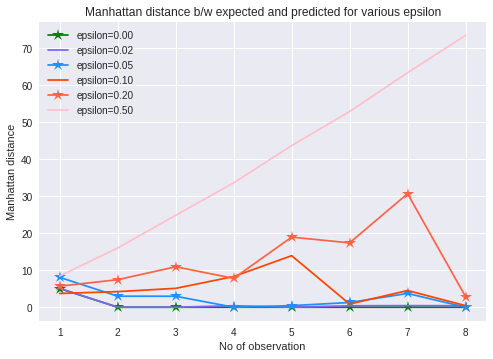

No handles with labels found to put in legend.


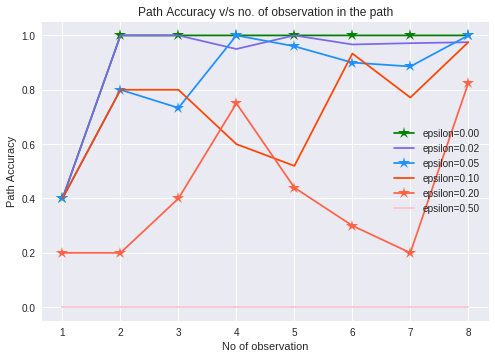

In [0]:
import matplotlib.pyplot as plt
# e=0.01
x=[]
for i in range(8):
  x.append(i+1)
  
#e=0.00
e0=[5.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
f0=[0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#e=0.02
e1=[5.05, 0., 0., 0.4, 0., 0.3875, 0.425, 0.3875]
f1=[0.4, 1., 1., 0.95, 1., 0.96666667, 0.97142857, 0.975]
# e=0.05
e2=[8.0625, 2.975,  2.9625, 0.,     0.425,  1.275,  3.725,  0.    ]
f2=[0.4, 0.8, 0.73333333, 1., 0.96, 0.9, 0.88571429, 1.]
# e=0.1
e3=[3.7125, 4.2125, 5.1, 8.2875, 13.925, 0.85, 4.5125, 0.425]
f3=[0.4, 0.8, 0.8, 0.6, 0.52, 0.93333333, 0.77142857, 0.975]
# e=0.2
e4=[5.6875, 7.4375, 10.925, 7.8, 18.9375, 17.3875, 30.675, 2.875]
f4=[0.2, 0.2, 0.4, 0.75, 0.44, 0.3, 0.2, 0.825]
# e=0.5
e5=[8.4375, 16.0125, 24.8375, 33.6125, 43.6625, 52.875, 63.375, 73.45]
f5=[0., 0., 0., 0., 0., 0., 0., 0.]

plt.xlabel('No of observation')
plt.ylabel("Manhattan distance" )
plt.title('Manhattan distance b/w expected and predicted for various epsilon')
plt.legend(loc='upper right')
plt.plot(x,e0,'g-',label='epsilon=0.00',marker="*",markersize=12)
plt.plot(x,e1,'mediumslateblue',label='epsilon=0.02',marker="+",markersize=12)
plt.plot(x,e2,'dodgerblue',label='epsilon=0.05',marker="*",markersize=12)
plt.plot(x,e3,'orangered',label='epsilon=0.10',marker="+",markersize=12)
plt.plot(x,e4,'tomato',label='epsilon=0.20',marker="*",markersize=12)
plt.plot(x,e5,'pink',label='epsilon=0.50',marker="+",markersize=12)
plt.legend()
plt.show()

plt.xlabel('No of observation')
plt.ylabel("Path Accuracy" )
plt.title('Path Accuracy v/s no. of observation in the path')
plt.legend(loc='upper right')
plt.plot(x,f0,'g-',label='epsilon=0.00',marker="*",markersize=12)
plt.plot(x,f1,'mediumslateblue',label='epsilon=0.02',marker="+",markersize=12)
plt.plot(x,f2,'dodgerblue',label='epsilon=0.05',marker="*",markersize=12)
plt.plot(x,f3,'orangered',label='epsilon=0.10',marker="+",markersize=12)
plt.plot(x,f4,'tomato',label='epsilon=0.20',marker="*",markersize=12)
plt.plot(x,f5,'pink',label='epsilon=0.50',marker="+",markersize=12)
plt.legend()
plt.show()

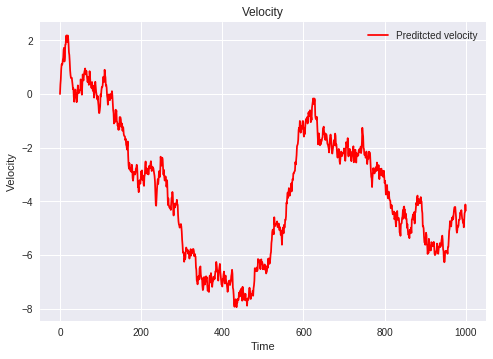

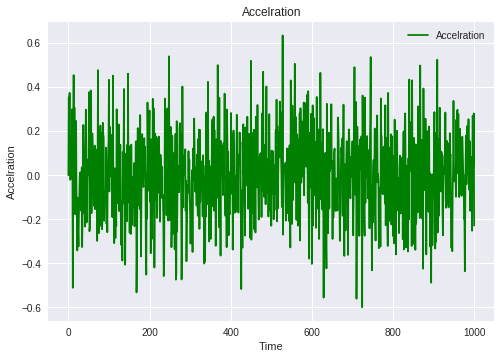

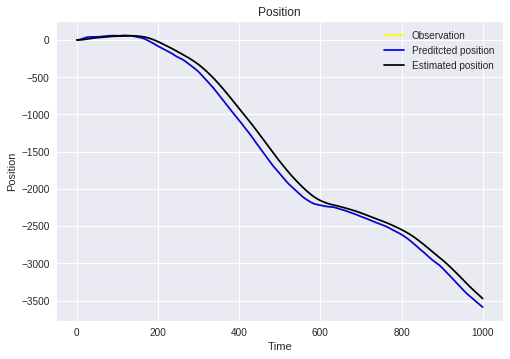

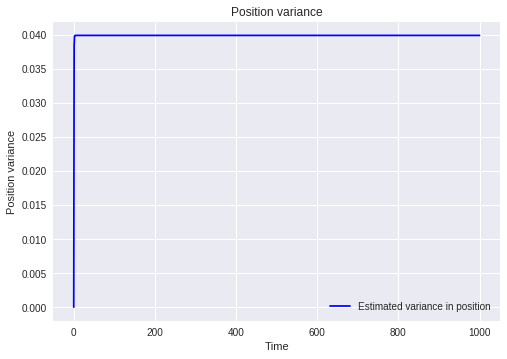

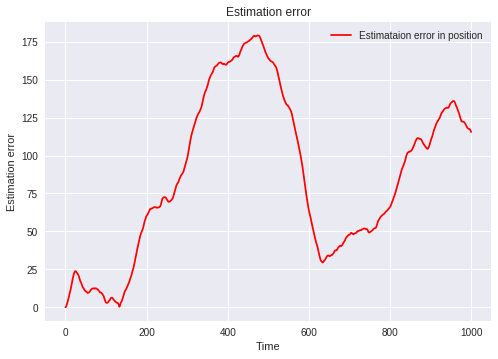

In [0]:
# Kalman filter

import random
import numpy as np
import matplotlib.pyplot as plt

# from scipy.interpolate import make_interp_spline

x = 0
v = 0
x_estimate = 0

np.random.seed(0)
total_steps = 1000
t = [i for i in range(total_steps + 1)]
dt = 1

sigma_x = 0
sigma_acc = 0.2
sigma_obs = 1

x_pred_array = [x]
v_pred_array = [v]
a_array = [0]

obs_array = [x]

x_estimate_array = [x]
sigma_x_array = [sigma_x]

estimation_error = [0]
for _ in range(total_steps):
  
  # Prediction step - X and V calculated for t + 1 timestep using previous values and random accelration.
  a = np.random.normal(0,sigma_acc)
  x = x + v * dt + a * dt * dt /2
  v = v + a * dt
  
  x_pred_array.append(x)
  v_pred_array.append(v)
  a_array.append(a)
  
  # sensor model - gaussian noise with mean = x and sigma = sigma_obs
  z = np.random.normal(0,sigma_obs);
  y = z + x

  obs_array.append(y)
  
  # Filtering using new evidence y
  sigma_sum = sigma_x**2 + sigma_acc**2 + sigma_obs**2
  x_estimate = ( (sigma_x**2 + sigma_acc**2)*y + (sigma_obs**2)*x_estimate ) / sigma_sum
  sigma_x = ((sigma_x**2 + sigma_acc**2)*sigma_obs**2) / sigma_sum
  
  x_estimate_array.append(x_estimate)
  sigma_x_array.append(sigma_x)
  estimation_error.append(abs(x_estimate - x))
  
plt.plot(t,v_pred_array,'red', label="Preditcted velocity")
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()

# t_smooth = np.linspace(0,total_steps-10,100) 
# print(t_smooth)
# a_array = [a_array[int(i)] for i in t_smooth]
# a_array = np.array(a_array)

# spl = make_interp_spline(t_smooth, a_array, k=3)
# a_smooth = spl(t_smooth)

plt.plot(t,a_array,'green', label="Accelration")
plt.title('Accelration')
plt.xlabel('Time')
plt.ylabel('Accelration')
plt.legend()
plt.show()

plt.plot(t,obs_array,'yellow', label="Observation")
plt.plot(t,x_pred_array,'blue', label="Preditcted position")
plt.plot(t,x_estimate_array,'black', label="Estimated position")
plt.title('Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

plt.plot(t,sigma_x_array,'blue', label="Estimated variance in position")
plt.title('Position variance')
plt.xlabel('Time')
plt.ylabel('Position variance')
plt.legend()
plt.show()

plt.plot(t,estimation_error,'red', label="Estimataion error in position")
plt.title('Estimation error')
plt.xlabel('Time')
plt.ylabel('Estimation error')
plt.legend()
plt.show()


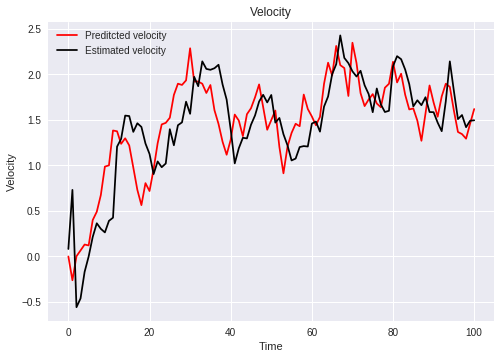

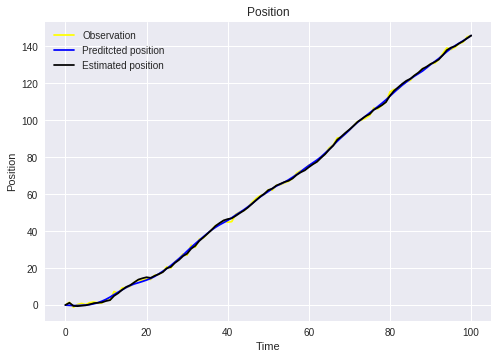

In [0]:
# Particle filter

import numpy as np
import matplotlib.pyplot as plt
import scipy

np.random.seed(0)
total_steps = 100
t = [i for i in range(total_steps + 1)]
dt = 1

sigma_acc = 0.2
sigma_obs = 1

number_of_particles = 100

# Initial prior - Standard normal
x_mean = 0
v_mean = 0
x_sigma = 1
v_sigma = 1

# Initialise particles and weights
particles_x = np.random.normal(x_mean,x_sigma,size=number_of_particles)
particles_v = np.random.normal(v_mean,v_sigma,size=number_of_particles)

weights = np.ones(number_of_particles)/number_of_particles

x_mean_est = np.average(particles_x,weights=weights)
v_mean_est = np.average(particles_v,weights=weights)

x_estimate_array = [x_mean_est]
v_estimate_array = [v_mean_est]

x_pred_array = [x_mean]
v_pred_array = [v_mean]

obs_array = [x_mean]

for _ in range(total_steps):
  
  # Prediction
  
  particles_accelration = np.random.normal(0,sigma_acc,number_of_particles)

  particles_x = particles_x.reshape(number_of_particles,1) + particles_v.reshape(number_of_particles,1) * dt \
  + dt * dt * particles_accelration.reshape(number_of_particles,1) / 2
  
  particles_v = particles_v.reshape(number_of_particles,1) + particles_accelration.reshape(number_of_particles,1) * dt
  
  # real x and v
  accelration = np.random.normal(0,sigma_acc)
  x_mean = x_mean + v_mean * dt + dt * dt * accelration / 2
  v_mean = v_mean + accelration * dt
  
  x_pred_array.append(x_mean)
  v_pred_array.append(v_mean)
  
  # sensor model - gaussian noise with mean = x and sigma = sigma_obs
  z = np.random.normal(0,sigma_obs)
  y = z + x_mean
  obs_array.append(y)

  # Filtering based on recent evidence
  particles_distribution = scipy.stats.norm(particles_x, sigma_obs)
  
  # Calculate weights based on likelihood of sampling a particle given the measurement y
  weights = particles_distribution.pdf(y)
  # Add small epsilon in case all weights become close to 0 to avoid divide by 0 in normalisation
  weights += 1e-20
  weights /= np.sum(weights)
  
#   print(weights)
#   weights.reshape(number_of_particles)
  x_mean_est = np.average(particles_x,weights=weights,axis=0)
  v_mean_est = np.average(particles_v,weights=weights,axis=0)
  
  x_estimate_array.append(x_mean_est)
  v_estimate_array.append(v_mean_est)

  # Resample
  indices = np.random.choice(a=number_of_particles,size=number_of_particles,replace=True,p=weights[:,0])
  particles_x = np.array([particles_x[index] for index in indices])
  particles_v = np.array([particles_v[index] for index in indices])
#   weights = np.ones(number_of_particles)/number_of_particles

plt.plot(t,v_pred_array,'red', label="Preditcted velocity")
plt.plot(t,v_estimate_array,'black', label="Estimated velocity")
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()

plt.plot(t,obs_array,'yellow', label="Observation")
plt.plot(t,x_pred_array,'blue', label="Preditcted position")
plt.plot(t,x_estimate_array,'black', label="Estimated position")
plt.title('Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()